In [19]:
# Code for mounting your Gdrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
import os
data = '/content/drive/MyDrive/img_class'
print(os.listdir(data))

['Anthracnose', 'Sooty Mould', 'Bacterial Canker', 'Cutting Weevil', 'Healthy', 'Gall Midge', 'Powdery Mildew', 'Die Back']


In [22]:
#https://drive.google.com/drive/folders/1HGaUosq247KbwHEAq-dkKU9Xr29QyNJy?usp=share_link
import pathlib
data_dir = "/content/drive/MyDrive/img_class"
data_dir = pathlib.Path(data_dir)
new_directory = "/content/drive/MyDrive/leaf_disease"


In [23]:
%mkdir /content/drive/MyDrive/leaf_disease
%cd /content/drive/MyDrive/leaf_disease/
%mkdir 'Anthracnose' 'Sooty Mould' 'Bacterial Canker' 'Cutting Weevil' 'Healthy' 'Gall Midge' 'Powdery Mildew' 'Die Back'

mkdir: cannot create directory ‘/content/drive/MyDrive/leaf_disease’: File exists
/content/drive/MyDrive/leaf_disease
mkdir: cannot create directory ‘Anthracnose’: File exists
mkdir: cannot create directory ‘Sooty Mould’: File exists
mkdir: cannot create directory ‘Bacterial Canker’: File exists
mkdir: cannot create directory ‘Cutting Weevil’: File exists
mkdir: cannot create directory ‘Healthy’: File exists
mkdir: cannot create directory ‘Gall Midge’: File exists
mkdir: cannot create directory ‘Powdery Mildew’: File exists
mkdir: cannot create directory ‘Die Back’: File exists


In [24]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

4000


In [25]:
batch_size = 32
img_height = 200
img_width = 200

train_ds = tf.keras.utils.image_dataset_from_directory(
  new_directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  new_directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4000 files belonging to 8 classes.
Using 3200 files for training.
Found 4000 files belonging to 8 classes.
Using 800 files for validation.


In [26]:
class_names = train_ds.class_names
print(class_names)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [27]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
num_classes = len(class_names)

cnn_model_1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,  activation='softmax')
])

In [31]:
cnn_model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)       

In [ ]:
epochs=5
history_cnn_model_1 = cnn_model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


100/100 [==============================] - 192s 2s/step - loss: 1.6745 - accuracy: 0.3603 - val_loss: 1.2682 - val_accuracy: 0.5075
Epoch 2/5
100/100 [==============================] - 182s 2s/step - loss: 0.8565 - accuracy: 0.7003 - val_loss: 0.7060 - val_accuracy: 0.7750
Epoch 3/5
100/100 [==============================] - 183s 2s/step - loss: 0.4715 - accuracy: 0.8359 - val_loss: 0.7728 - val_accuracy: 0.7250
Epoch 4/5
100/100 [==============================] - 173s 2s/step - loss: 0.3276 - accuracy: 0.8819 - val_loss: 0.3731 - val_accuracy: 0.8712
Epoch 5/5
100/100 [==============================] - 183s 2s/step - loss: 0.2503 - accuracy: 0.9172 - val_loss: 0.3922 - val_accuracy: 0.8700


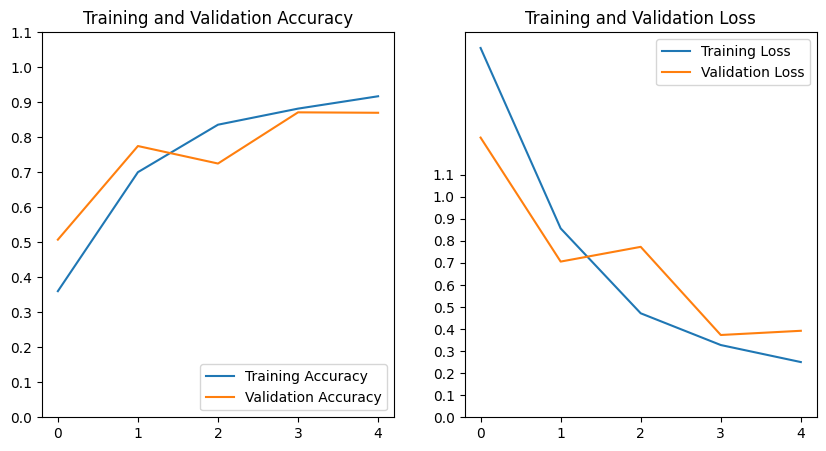

In [ ]:
acc = history_cnn_model_1.history['accuracy']
val_acc = history_cnn_model_1.history['val_accuracy']

loss = history_cnn_model_1.history['loss']
val_loss = history_cnn_model_1.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.yticks(y_ticks)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
import glob
from sklearn.model_selection import train_test_split
import os

data = []
labels = []

classes = {}
classes_dir = enumerate(os.listdir(new_directory))
for i, j in classes_dir:
    classes[j] = i
print(classes)

data = np.array(data)
labels = np.array(labels)
#print(labels)

X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)
                                                

{'Anthracnose': 0, 'Sooty Mould': 1, 'Bacterial Canker': 2, 'Cutting Weevil': 3, 'Healthy': 4, 'Gall Midge': 5, 'Powdery Mildew': 6, 'Die Back': 7}
Anthracnose
Bacterial Canker
Cutting Weevil
Die Back
Gall Midge
Healthy
Powdery Mildew
Sooty Mould


In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [35]:
np.unique(ytrain)
nsamples, nx, ny, nz = X_train.shape
X_train_modified = X_train.reshape((nsamples,nx*ny*nz))
nsamples, nx, ny, nz = X_test.shape
X_test_modified = X_test.reshape((nsamples,nx*ny*nz))

In [36]:
## Naive Bayes Classification
nbc = GaussianNB()
nbc.fit(X_train_modified,ytrain)
nbc_pred = nbc.predict(X_test_modified)
accuracy_score(nbc_pred,ytest)
print("Report of NBC Classification - ")
print(classification_report(nbc_pred,ytest))

Report of NBC Classification - 
              precision    recall  f1-score   support

           0       0.54      0.66      0.60       102
           1       0.38      0.36      0.37        98
           2       0.77      0.65      0.71       101
           3       0.82      0.74      0.78       125
           4       0.58      0.47      0.52       110
           5       0.29      0.32      0.30        93
           6       0.49      0.45      0.47        99
           7       0.53      0.75      0.62        72

    accuracy                           0.55       800
   macro avg       0.55      0.55      0.55       800
weighted avg       0.56      0.55      0.55       800



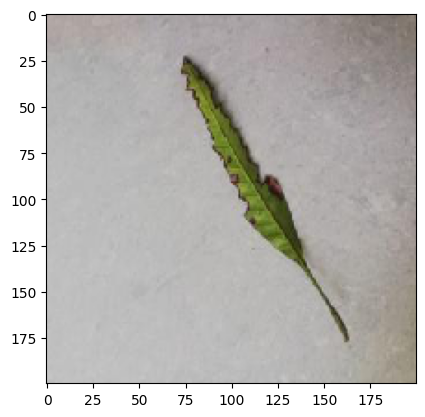


Cutting Weevil


In [37]:
import matplotlib.pyplot as plt
img_path = X_test[0]
plt.imshow(img_path)
plt.show()
print()
prediction_nbc = nbc.predict(X_test[0].reshape(1,200*200*3))
for i in range(8):
  if prediction_nbc == i:
    print(class_names[i])

In [38]:
## KNN classification
knn_classifier_model = KNeighborsClassifier(n_neighbors=10)
knn_classifier_model.fit(X_train_modified,ytrain)
knn_classifier_prediction = knn_classifier_model.predict(X_test_modified)
accuracy_score(knn_classifier_prediction,ytest)
print("Report of KNN Classification - ")
print(classification_report(knn_classifier_prediction,ytest))

Report of KNN Classification - 
              precision    recall  f1-score   support

           0       0.59      0.68      0.63       107
           1       0.67      0.58      0.62       106
           2       0.91      0.51      0.65       153
           3       0.49      1.00      0.66        55
           4       0.59      0.67      0.63        79
           5       0.43      0.63      0.51        71
           6       0.62      0.73      0.67        77
           7       0.88      0.59      0.70       152

    accuracy                           0.64       800
   macro avg       0.65      0.67      0.64       800
weighted avg       0.70      0.64      0.64       800



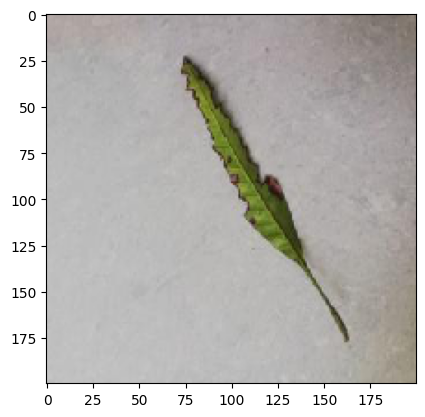


Cutting Weevil


In [39]:
import matplotlib.pyplot as plt
img_path = X_test[0]
plt.imshow(img_path)
plt.show()
print()
prediction_knn = knn_classifier_model.predict(X_test[0].reshape(1,200*200*3))
for i in range(8):
  if prediction_knn == i:
    print(class_names[i])

In [40]:
## Decision Tree Classification
decision_tree_classifier_model = DecisionTreeClassifier()
decision_tree_classifier_model.fit(X_train_modified,ytrain)
decision_tree_prediction = decision_tree_classifier_model.predict(X_test_modified)
accuracy_score(decision_tree_prediction,ytest)
print("Report of Decision Tree Classification - ")
print(classification_report(decision_tree_prediction,ytest))

Report of Decision Tree Classification - 
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       110
           1       0.47      0.49      0.48        89
           2       0.71      0.67      0.69        91
           3       0.91      0.93      0.92       110
           4       0.61      0.65      0.63        85
           5       0.52      0.50      0.51       109
           6       0.63      0.58      0.60        98
           7       0.83      0.78      0.80       108

    accuracy                           0.67       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.67      0.67      0.67       800



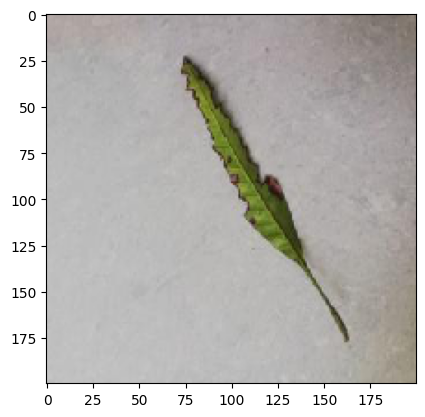


Cutting Weevil


In [41]:
import matplotlib.pyplot as plt
img_path = X_test[0]
plt.imshow(img_path)
plt.show()
print()
prediction_dt = decision_tree_classifier_model.predict(X_test[0].reshape(1,200*200*3))
for i in range(8):
  if prediction_dt == i:
    print(class_names[i])

In [44]:
## Support Vector Classification
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.svm import SVC

svm_model = Sequential()
svm_model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(200,200,3)))
svm_model.add(MaxPooling2D(pool_size=(6,6),strides = 6))

svm_model.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
svm_model.add(MaxPooling2D(pool_size=(6,6),strides = 6))

svm_model.add(Flatten())
svm_model.add(Dense(128,activation="relu"))

#Output layer
svm_model.add(Dense(6,kernel_regularizer=tf.keras.regularizers.L1(0.01),activation = "softmax"))

In [ ]:
svm_model.compile(optimizer='adam',
              loss=tf.keras.losses.SquaredHinge(),
              metrics=['accuracy'])

epochs = 10
history_svm_model = svm_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
100/100 [==============================] - 44s 331ms/step - loss: 1.3735 - accuracy: 0.1262 - val_loss: 1.1205 - val_accuracy: 0.1187
Epoch 2/10
100/100 [==============================] - 37s 372ms/step - loss: 0.9749 - accuracy: 0.1266 - val_loss: 0.8831 - val_accuracy: 0.1187
Epoch 3/10
100/100 [==============================] - 37s 374ms/step - loss: 0.8702 - accuracy: 0.1262 - val_loss: 0.8708 - val_accuracy: 0.1300
Epoch 4/10
100/100 [==============================] - 34s 345ms/step - loss: 0.8634 - accuracy: 0.1238 - val_loss: 0.8602 - val_accuracy: 0.1300
Epoch 5/10
100/100 [==============================] - 35s 352ms/step - loss: 0.8578 - accuracy: 0.1238 - val_loss: 0.8578 - val_accuracy: 0.1300
Epoch 6/10
100/100 [==============================] - 31s 311ms/step - loss: 0.8562 - accuracy: 0.1238 - val_loss: 0.8567 - val_accuracy: 0.1300
Epoch 7/10
100/100 [==============================] - 48s 482ms/step - loss: 0.8660 - accuracy: 0.1275 - val_loss: 0.9016 - val_ac

In [42]:
## Random Forest Classification
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_modified,ytrain)
random_forest_model_prdiction = random_forest_model.predict(X_test_modified)
accuracy_score(random_forest_model_prdiction,ytest)
print("Report of Random Forest Classification - ")
print(classification_report(random_forest_model_prdiction,ytest))
confusion_matrix(random_forest_model_prdiction,ytest)

Report of Random Forest Classification - 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       111
           1       0.84      0.78      0.81       100
           2       0.92      0.81      0.86        97
           3       0.98      0.96      0.97       114
           4       0.84      0.85      0.85        89
           5       0.77      0.78      0.78       102
           6       0.85      0.90      0.87        86
           7       0.95      0.95      0.95       101

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



array([[107,   0,   0,   0,   0,   3,   0,   1],
       [  4,  78,   2,   0,   4,   6,   6,   0],
       [  3,   2,  79,   0,   2,   7,   1,   3],
       [  4,   0,   0, 110,   0,   0,   0,   0],
       [  0,   4,   0,   0,  76,   7,   2,   0],
       [  2,   5,   5,   0,   4,  80,   5,   1],
       [  0,   4,   0,   0,   4,   1,  77,   0],
       [  3,   0,   0,   2,   0,   0,   0,  96]])

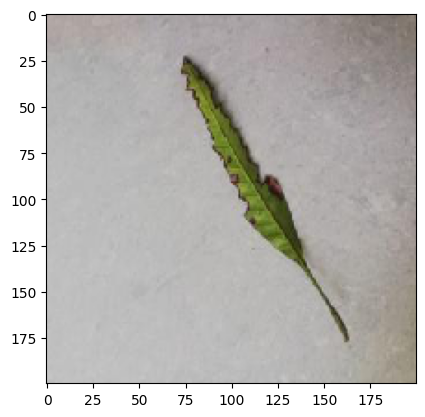


Cutting Weevil


In [54]:
import matplotlib.pyplot as plt
img_path = X_test[0]
plt.imshow(img_path)
plt.show()
print()
prediction_rfc = random_forest_model.predict(X_test[0].reshape(1,200*200*3))
for i in range(8):
  if prediction_rfc == i:
    print(class_names[i])

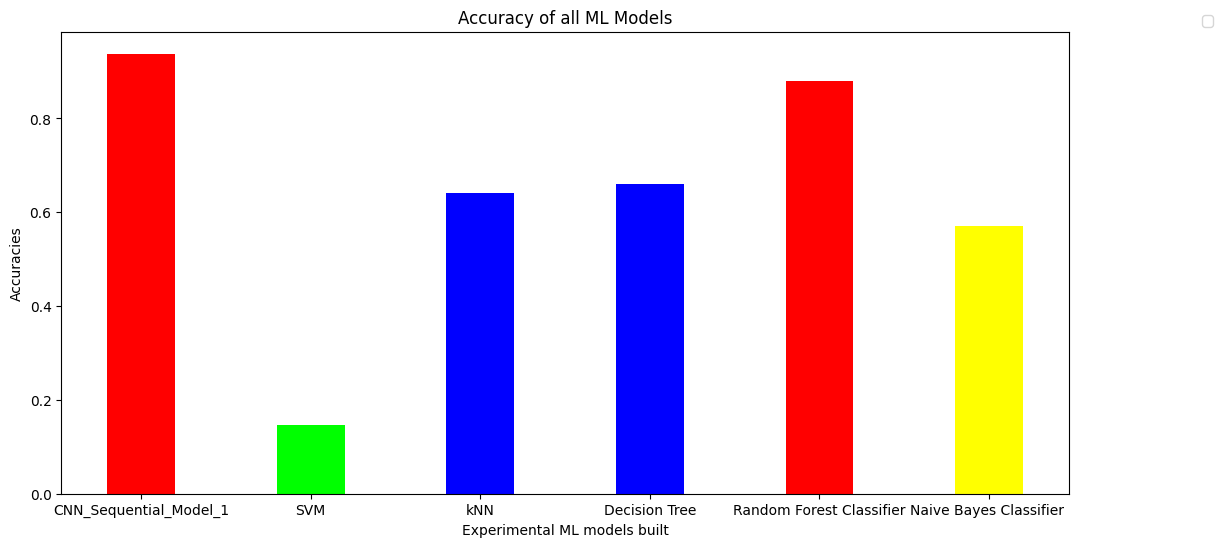

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

models = ['CNN_Sequential_Model_1', 'SVM', 'kNN', 'Decision Tree', 'Random Forest Classifier', 'Naive Bayes Classifier ']
val_accuracies = [0.9381, 0.14523, 0.64, 0.66, 0.88, 0.57] # hardcoded the results from the output of report/history
X_axis = np.arange(len(models))
fig = plt.figure(figsize = (13, 6))
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 0, 1), (1, 0, 0), (1, 1, 0)]
# creating the bar plot
plt.bar(X_axis, val_accuracies, width = 0.4, color=colors)
plt.xticks(X_axis, models)
plt.xlabel("Experimental ML models built")
plt.ylabel("Accuracies")
plt.title("Accuracy of all ML Models")
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.show()

In [46]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 

In [61]:
model_options = ["CNN","NBC","kNN","SVM","DT","RFC"]

def prdtict(model_choice, image_to_classifyy):
  if str(model_choice) == "CNN":
    image_1 = image_to_classifyy.reshape(-1,200,200,3)
    prediction = cnn_model_1.predict(image_1)[0]
    return {class_names[i]: float(prediction[i]*6) for i in range(8)}
  elif str(model_choice) == "NBC":
    image_2 = image_to_classifyy.reshape(-1,200*200*3)
    prediction_1 = nbc.predict(image_2)[0]
    return {class_names[i]: float(prediction_1[i]) for i in range(8)}
  elif str(model_choice) == "kNN":
    image_3 = image_to_classifyy.reshape(-1,200,200,3)
    prediction_2 = knn_classifier_model.predict(image_3)[0]
    return {class_names[i]: float(prediction_2[i]) for i in range(8)}
  elif str(model_choice) == "SVM":
    image_4 = image_to_classifyy.reshape(-1,200,200,3)
    prediction_3 = knn_classifier_model.predict(image_4)[0]
    return {class_names[i]: float(prediction_3[i]) for i in range(8)}
  elif str(model_choice) == "DT":
    image_5 = image_to_classifyy.reshape(-1,200,200,3)
    prediction_4 = decision_tree_classifier_model.predict(image_5)[0]
    return {class_names[i]: float(prediction_4[i]) for i in range(8)}
  elif str(model_choice) == "RFC":
    image_6 = image_to_classifyy.reshape(-1,200,200,3)
    prediction_5 = random_forest_model.predict(image_6)[0]
    return {class_names[i]: float(prediction_5[i]) for i in range(8)}


mdl = gr.inputs.Dropdown(choices=model_options)
image = gr.inputs.Image(shape=(200,200))
inputs = [mdl, image]
label = gr.outputs.Label(num_top_classes=1)
title = "Leaf Disease App"
description = "CSE5334 - Final Project: This is a leaf image classifier app which classifies an uploaded image to one of the eight classes as - Anthracnose, Bacterial Canker, Cutting Weevil, Die Back, Gall Midge, Healthy, Powdery Mildew, Sooty Mould"

iface = gr.Interface(
    fn=prdtict, 
    inputs=inputs, 
    outputs=label,
    title=title,
    description=description
)

if __name__ == '__main__':
    iface.launch(share=True, debug=True)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(val

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://93caba4485d7dcde6c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 32ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://93caba4485d7dcde6c.gradio.live
